## Project: vehicles
Problem Description:
A chain of car repair shops called “Prospect Auto” asked you for a model that would differentiate all 3 vehicles based on the silhouette. So, eventually, you need to create a classification model that would predict a vehicle class. The question that may arise: what exactly is needed to approach this project? Let’s discuss it in the next section!

Objective: Multiclass-Classification (bus/van/car) from numerical features

In [1]:
# Imports
import pandas as pd
import numpy as np # np and pd for handling

import matplotlib.pyplot as plt # EDA
import seaborn as sns # Visuals

from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.preprocessing import StandardScaler # Scaling
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # import evaluation metrics
from sklearn.linear_model import LogisticRegression # ML - logisitc regression (Sigmoid) ->Y ML Model
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score # overfitting check

In [ ]:
# Load Data
from google.colab import files
uploaded = files.upload()

Saving vehicle.csv to vehicle.csv


In [ ]:
#  Data Frame Overview
df = pd.read_csv("vehicle.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


# EDA
* NaN Check
* Dtype Check
* check Features scaling / distributions
* class distribution



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

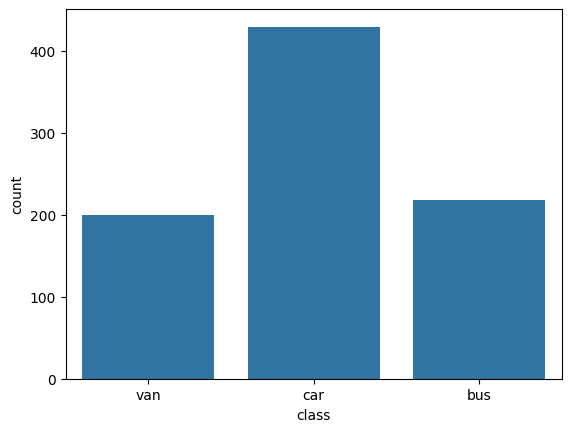

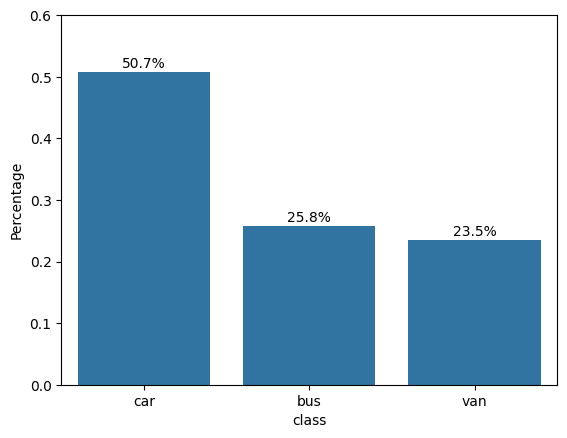

<Figure size 640x480 with 0 Axes>

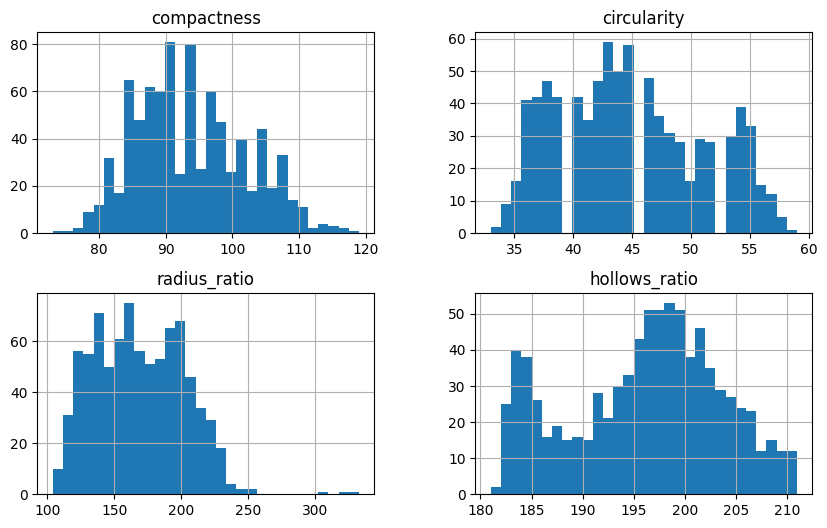

<Figure size 640x480 with 0 Axes>

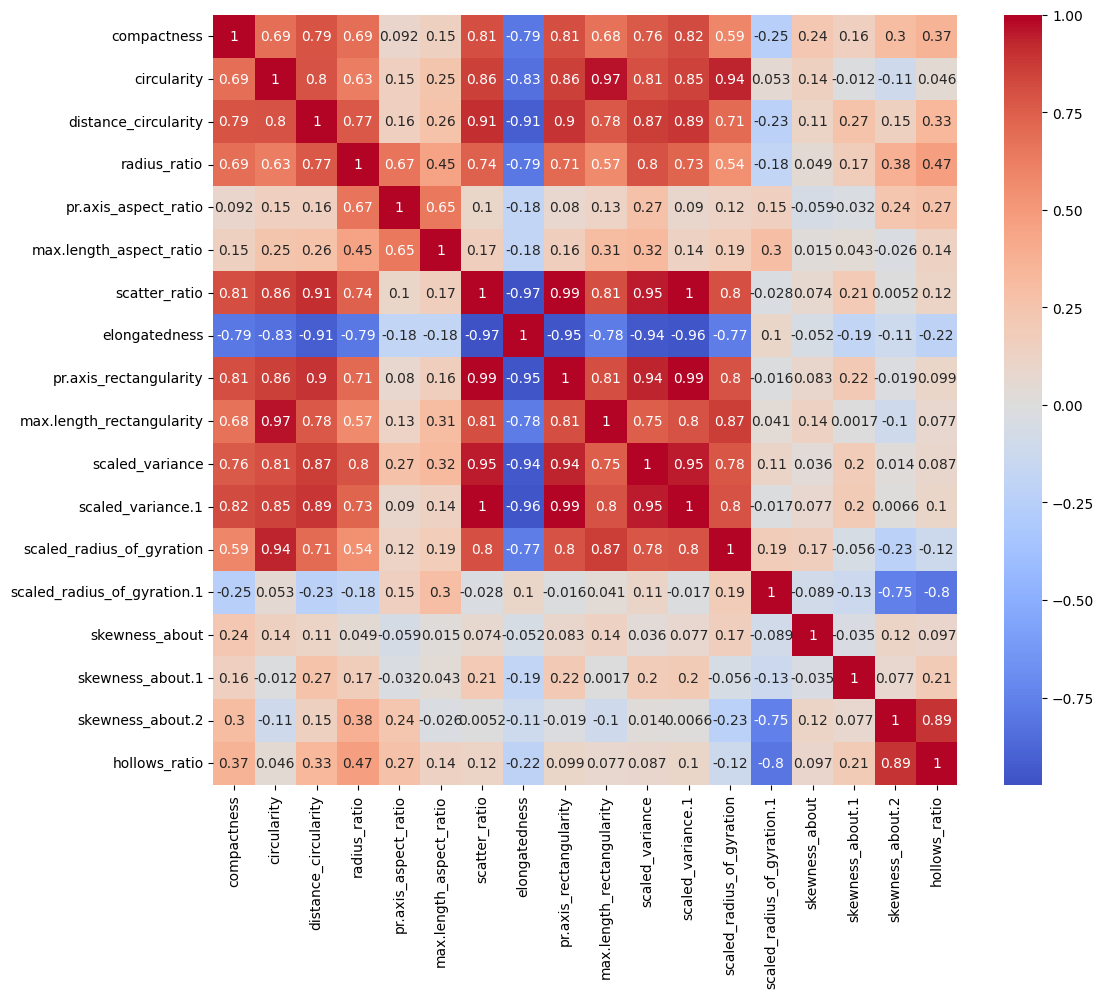

In [ ]:
# EDA
df.isna().sum()
df.info()
df["class"].value_counts()


# target variable distribution:
# barplot counts absolut
plt.figure
sns.countplot(x="class", data=df)

# barplot counts relativ (%)
# defining col for %:
plt.figure()
class_perc = df["class"].value_counts(normalize=True).reset_index()
class_perc.columns = ["class", "percentage"]
# Plot:
ax = sns.barplot(x="class", y="percentage", data=class_perc)
# showing labels on the plot:
for p in ax.patches:
  ax.annotate(
      f"{p.get_height()*100:.1f}%", # berechnet die Prozente auf Basis der Balkenhöhe
      (p.get_x() + p.get_width() / 2., p.get_height() + 0.002), # location - placing the Patches (x, y coordinates plus offset)
      ha="center",
      va="bottom" # formating label
  )
ax.set_ylabel("Percentage")
plt.ylim(0, 0.6) # Formatting the y-axis scale from 0 to 60%
plt.show()


# features distribtion:
# Check feature distributions using a sample
plt.figure()
cols = ["compactness", "circularity", "radius_ratio", "hollows_ratio"]
df[cols].hist(bins=30, figsize=(10,6))
plt.show()

# Deeper EDA: correlation matrix and descriptive statistics for a better overview
df.describe().T

#corr matrix absolut
plt.figure()
corr = df.drop(columns="class").corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.show()
# Some features show strong pairwise correlations, indicating partial redundancy. In principle, dimensionality reduction techniques such as PCA could be considered to reduce feature redundancy.
# However, since the baseline model already performs well and remains interpretable, PCA was not applied in this project.


# EDA Findings:
# - Missing Values: Several numerical features contain a small number of missing values
# - Data Types: Target variable 'class' is of type object; all other features are numeric
# - Target Distribution: Three classes with slight class imbalance towards 'car'
# -- car: 50% (n=429)
# -- bus: 25% (n=218)
# -- van: 23% (n=199)
# - Feature Distribution:
# -- compactness: approximately normally distributed and fairly symmetric
# -- circularity: roughly symmetric with a flatter distribution and wider spread -> Indicates more evenly distributed values across the range. Distribution shows three gaps.
# -- radius_ratio: approximately normal with slight right skew and a few high-value outliers
# -- hollows_ratio: roughly normal but shows a left-side peak and potential substructure, suggesting possible clustering or multi-modal behavior
# - Pairwise Correlation: Some features show strong pairwise correlations



# Decisions based on EDA:
# - Handle missing values during preprocessing: NaN Imputaiton with .mean()
# - Apply feature scaling due to different numerical scales
# - Start with a baseline classification model
# - Consider dimensionality reduction (e.g. PCA) as a potential follow-up step, due to strong pairwise correlation
# - apply standard scaler to normalize feature scalings
# - Model Descision: Logistic regression, due to the target variable beeing a discrete, categorical variable, with numerical features. LogReg is well suited for multiclass calssification.


## Preprocessing
* Target Variable & Features trennen
* Dtype Conversion
* Train Test Split

Pipeline Design:
* NaN Handling
* Feature Scaling
* model defintion

Preprocessing Summary

**(df)**

In [ ]:
# Preprocessing
# defining target variable & features
# - target variable -> y = "class"
# - features -> x = all numerical values

X = df.drop(columns="class") # features (df)
y = df["class"] # target (Series)

X
y

# Dtype Conversion: not relevant

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)


# Pipeline: imputer (NaN.mean()), standard scaler, log regression
clf_classificationmodel = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000)) # max iterations: maximum iterations for optimize and find modellparameters (2000). Parameter anpassen (Gradienten Verfahren)
])

# PreProcessing Summary:
# - target variable definde: y = class
# - featuers defined: X = all numerical columns
# - standard train test split: test size 80/20
# -- stratify, to ensure class distribution from the original df is preserved in the samples
# - Pipeline:
# -- simple imputer (strategy=mean) for missing values
# -- standardscaler() for feature scaling
# -- log. regression is well suited for multiclass classification


## Train & Predict

zum Verständnis: Das eigentliche ML besteht aus drei Bausteinen:
* LogisticRegression(max_iter=2000) = Definition "Bauplan" für den ML -> (so möchte ich das ML durchführen)
* .fit() -> führt das ML nach dem "Bauplan" aus
* .predict(test data) -> schätzt y Dach

Summary

In [ ]:
# Train ML
clf_classificationmodel.fit(X_train, y_train)

# Predict y_pred
y_pred = clf_classificationmodel.predict(X_test)


# Optional check:
# 1. Quick check to verify that the code runs correctly: displays the first 10 elements of the result
y_pred[:10]

# 2. quick comparison y_true vs. y_pred
pd.DataFrame({
    "y_true": y_test.iloc[:10].reset_index(drop=True),
    "y_pred": y_pred[:10]
})

# Summary Train, Predict:
# - trained on basis of dataset X_train & y_train
# - predicted on basis of dataset X_test
# - check: ML code works correctly

,y_true,y_pred
0,bus,bus
1,car,car
2,car,car
3,car,car
4,car,car
5,bus,bus
6,bus,bus
7,car,car
8,car,car
9,bus,bus


## Evaluate
* accuracy
* f1
* precision
* recall

Evaluation Summary

In [ ]:
# Evaluation metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"F1: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Evaluation Summary:
# The model achieves consistently high performance across all evaluation metrics, with all scores reaching > 93%.
# - The model performs well on the given dataset.
# The given Scenario (business case) doesn't include the necessity to prioritize precision or recall (no high error costs on either side),
# so the combined F1-score is arguably the most suited metric for evaluation, since it provides the most balanced view of the models performance

F1: 0.935
Accuracy: 0.935
Precision: 0.938
Recall: 0.935


## Model Validation / Robustness
* Crossvalidation (CV) to evaltuate overfitting / generalization

CV Summary

In [ ]:
# CV
cv_scores = cross_val_score(
    clf_classificationmodel,
    X,
    y,
    cv = 20,
    scoring = "f1_weighted"
)
print(cv_scores)

print(f"\nMean of f1 scores: {cv_scores.mean()}, with standard deviation of: {cv_scores.std()}")

# CV Summary:
# Cross validation was applied for further assess if the model overfits.
# Using 20-fold Cross-Validation, the model achieved a mean F1 score of 0.95 (95%), with low standard deviation around 0.034.
# The F1-scores of the individual cross-validation folds typically deviate by around ±3.4 percentage points from the mean F1-score of approximately 95%,
# inidcating that the likelihood of overfitting is low


[0.93218661 0.95348837 0.97639059 0.90443975 0.95377167 0.97674419
 0.97648051 0.88039543 0.97590044 0.95344815 0.90568813 0.92791005
 1.         0.88152913 0.97646701 1.         0.92929796 0.95238095
 0.95226974 0.92929366]

Mean of f1 scores: 0.9469041174617425, with standard deviation of: 0.034334112589445964


## Closing Summary:
A supervised classification model was developed to differentiate between cars,
vans and buses based on numerical silhouette features.
The logistic regression model achieved strong and consistent performance, with
accuracy and weighted F1-scores around 93–95%.
Cross-validation confirmed that the model generalizes well across different data
splits, indicating a low likelihood of overfitting.
Given the stable performance the model is well suited for the given classification task and can be reliably used to
predict vehicle classes for the Prospect Auto use case.


## Roadmap

* df_unsup = df.copy()
* Imputation (wahrscheinlich nicht nötig) + Scaling
* PCA → Explained Variance + Plot
* Entscheidung: #PCs
* Clustering (KMeans, k=3)
* Evaluation (ARI / NMI / Silhouette)
* Kurzes Fazit:
„PCA war / war nicht effizient, Clustering trennt Klassen gut / mittelmäßig“

In [ ]:
# Safety Copy of df
df_unsup = df.copy()
df_unsup.shape
df_unsup.isna().sum()

# - nan values existent, since nan where removed in pipeline and df was not safed
# -- nan imputation needs to be done for PCA
# -- Pipeline needs to be build, strategy="mean"

,0
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


## Train Test Split
* drop "class" for unsupervised learning (prevent data leakage)
* preserve "class" for evaluation
* train test split with default parameters (test size 0.2)

In [ ]:
# drop "class"
X_unsup = df_unsup.drop(columns="class") # drop for unsupervised learning
y_true = df_unsup["class"] # preserve for evaluation


# Train Test Split
X_train, X_test, y_train_true, y_test_true = train_test_split(
    X_unsup, y_true,
    test_size=0.2,
    random_state=42,
    stratify=y_true
)


# Summary:
# - col "class" dropped for unsupervised learning
# - col "class" safed for evaluation (y_true)
# - train test split

## PCA Pipeline

**(df_unsup)**

In [ ]:
# Import
from sklearn.decomposition import PCA



# Pipeline
pca_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("pca", PCA())
])

X_train_pca_all = pca_pipeline.fit_transform(X_train)
X_test_pca_all = pca_pipeline.transform(X_test)

# Summary:
# - pipeline defined, nan imputet, df standardscaled
# - train and test set fitted and transformed

## Explained Variance
* plot
* Elbow (90-95%)


**(df_unsup)**

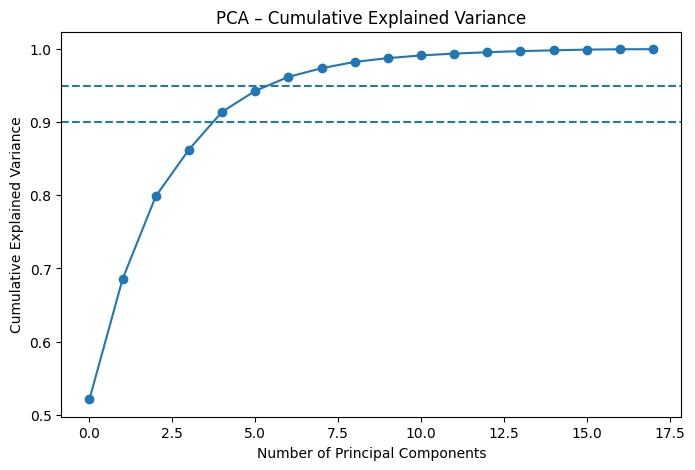

In [ ]:
# explained var
explained_var = pca_pipeline.named_steps["pca"].explained_variance_ratio_
cum_var = explained_var.cumsum()

# plot variance
plt.figure(figsize=(8,5))
plt.plot(cum_var, marker="o") # setzt Punkte auf jede Datenstelle (PCs)
plt.axhline(0.90, linestyle="--") # threshold 90% expl var
plt.axhline(0.95, linestyle="--") # threshold 95% expl var
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Cumulative Explained Variance")
plt.show()

# Summary:
# - elbow strat shows viable points between PC4 and PC6
# - evaluating the threshold of 95% of explained variance it is recommended to choose 5 PCs
# - k = 5

## PC Analysis:
* determine k
* final PCA

**(df_unsup)**

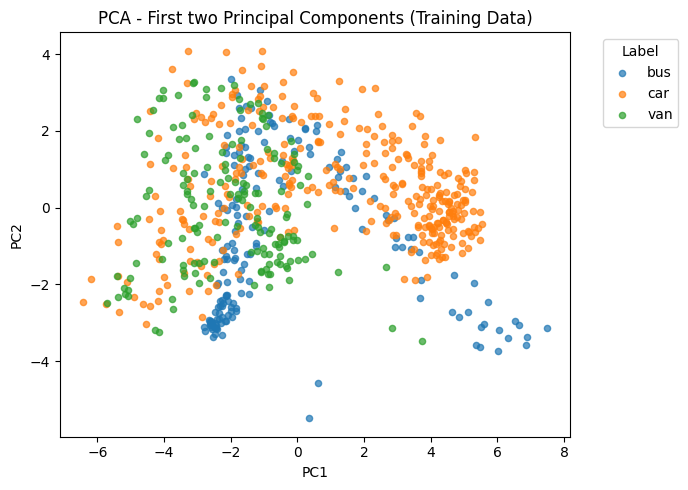

In [ ]:
# k
k = 5



# pipeline
pca_pipeline_k = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=k))
])



# fit with k = 5
X_train_pca = pca_pipeline_k.fit_transform(X_train)
X_test_pca  = pca_pipeline_k.transform(X_test)

X_train_pca.shape, X_test_pca.shape



# Visual PCs
def plot_pc_scatter(X_2d, labels, title, xlabel="PC1", ylabel="PC2"):
    plt.figure(figsize=(7,5))
    unique = np.unique(labels)
    for lab in unique:
        idx = labels == lab
        plt.scatter(X_2d[idx, 0], X_2d[idx, 1], s=20, alpha=0.7, label=str(lab))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

plot_pc_scatter(X_train_pca[:, :2], y_train_true, title='PCA - First two Principal Components (Training Data)')



# Summary:
# - setting k = 5, for 95% explained variance
# - X_Train: 676 datapoints, 5 PCs
# - X_Test: 170 datapoints, 5 PCs
# Visual interpretation:
# - The PCA scatter plot of the first two principal components shows that the data points
#   are well distributed along PC1 and PC2, indicating that a large portion of the
#   overall variance is captured by these components.
# - This supports the decision to reduce the original feature space to 5 principal
#   components, as most of the structural information in the data is preserved.

# --> PC analysis ist efficient for this dataset, using 5 PCs upwards

## Kmeans
* unsupervised Clustering

**(df_unsup)**

In [ ]:
# Import
from sklearn.cluster import KMeans

# kmeans:
kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10
)

# fit Kmeans:
kmeans.fit(X_train_pca)

y_train_pred = kmeans.predict(X_train_pca)
y_test_pred  = kmeans.predict(X_test_pca)

## Evalutation
* **Adjusted Rand Index (ARI)** measurement of similarity between real labels and labels found by our classification model (kmeans)
* - Skala: [-1, 1]
* - 1.0 → perfekte Übereinstimmung
* - 0.0 → Zufallsniveau
* - < 0 → schlechter als Zufall

* **Normalized Mutual Information (NMI)** quantifies how much information about the true class labels is contained in the cluster assignments produced by an unsupervised model. It evaluates the statistical dependence between the two labelings, independent of any geometric distance in feature space.
* - Skala: [0, 1]
* - 0.0 → keine gemeinsame Information
* - 1.0 → perfekte Übereinstimmung

**(df_unsup)**


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Unsupervised evaluation vs. true labels (use TEST for honest evaluation)
ari_test = adjusted_rand_score(y_test_true, y_test_pred)
nmi_test = normalized_mutual_info_score(y_test_true, y_test_pred)
sil_test = silhouette_score(X_test_pca, y_test_pred)

print(f"ARI (test): {ari_test:.3f}")
print(f"NMI (test): {nmi_test:.3f}")
print(f"Silhouette (test): {sil_test:.3f}")

# Summary:
# - ARI low < 0.1: Classreconstruction via unsipervised learning (kmeans) does not work reliably
# - NMI low ~ 0.1: littel class information is retained
# The low ARI and NMI scores indicate that the unsupervised clustering approach is not able to reliably recover the true vehicle classes.
# This suggests that the geometric feature space alone is insufficient for accurate class separation without labels.
# Consequently, supervised learning remains the more suitable approach for the Prospect Auto classification problem.



ARI (test): 0.083
NMI (test): 0.124
Silhouette (test): 0.348


## Closing Summary:
In this project, a supervised and an unsupervised approach were applied to classify vehicle silhouettes into three categories (car, van, bus).
The supervised logistic regression model achieved strong performance, showing that the available features are well suited for classification when class labels are provided.
For the unsupervised approach, the data was standardized and reduced using Principal Component Analysis (PCA).
The number of features was reduced from 18 to 5 principal components while retaining most of the variance, indicating redundancy in the original feature space.
PCA therefore proved useful as a dimensionality reduction step.

KMeans clustering was then applied to the PCA-transformed data. Evaluation using ARI, NMI, and the Silhouette Score showed that the unsupervised clusters only weakly correspond to the true vehicle classes. This suggests that, although some geometric structure is present in the data, it is not sufficient to reliably separate the classes without labels.

Overall, this project highlights the difference between supervised and unsupervised learning: supervised models are more suitable for accurate classification in this task, while unsupervised methods are mainly helpful for exploring and understanding the underlying data structure.
